In [4]:
import pandas as pd

# 엑셀 파일 불러오기
df = pd.read_excel('/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Model_3.xlsx', engine='openpyxl')  # 파일 경로 지정

df


,StudyID,Timestamp,bored,hungry,How_happy,How_cheerful,How_relaxed,How_stressed,How_anxious,How_angry,...,CGM_90min_max,CGM_90min_cv,CGM_90_GV,CGM_90_GE_count,GE_30min_occurred,GE_60min_occurred,GE_90min_occurred,Date,Within_day,within_day_num
0,1,2022-10-06 08:11:56,0,0,0.666667,1.000000,0.666667,0.333333,0.333333,0.0,...,98,5.969966,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
1,1,2022-10-06 13:37:27,0,0,0.666667,0.666667,0.333333,0.333333,0.666667,0.0,...,106,7.541038,Low,0,0,0,0,2022-10-06,1_2022-10-06,75
2,1,2022-10-06 15:39:36,0,0,1.000000,1.000000,1.000000,0.000000,0.333333,0.0,...,109,2.523722,Low,2,0,0,1,2022-10-06,1_2022-10-06,75
3,1,2022-10-06 16:28:38,0,0,1.000000,1.000000,0.666667,0.000000,0.000000,0.0,...,106,1.275994,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
4,1,2022-10-06 18:23:32,0,0,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,105,5.616072,Low,1,0,1,1,2022-10-06,1_2022-10-06,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,89,2023-05-08 18:58:36,0,0,1.000000,1.000000,0.666667,0.333333,0.333333,0.0,...,149,12.634415,Low,2,0,1,1,2023-05-08,89_2023-05-08,727
3650,89,2023-05-09 09:09:45,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,132,14.644312,Low,2,0,1,1,2023-05-09,89_2023-05-09,728
3651,89,2023-05-09 11:22:51,0,1,1.000000,1.000000,0.333333,0.333333,0.000000,0.0,...,123,12.240737,Low,1,0,1,1,2023-05-09,89_2023-05-09,728
3652,89,2023-05-09 15:28:26,0,0,1.000000,0.666667,0.666667,0.000000,0.000000,0.0,...,92,5.859637,Low,1,0,0,1,2023-05-09,89_2023-05-09,728


In [6]:
# 데이터 확인
print("데이터프레임 정보:")
print(df.info())

데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StudyID                3654 non-null   int64         
 1   Timestamp              3654 non-null   datetime64[ns]
 2   bored                  3654 non-null   int64         
 3   hungry                 3654 non-null   int64         
 4   How_happy              3654 non-null   float64       
 5   How_cheerful           3654 non-null   float64       
 6   How_relaxed            3654 non-null   float64       
 7   How_stressed           3654 non-null   float64       
 8   How_anxious            3654 non-null   float64       
 9   How_angry              3654 non-null   float64       
 10  How_sad                3654 non-null   float64       
 11  How_energetic          3654 non-null   float64       
 12  How_tired              3654 non-null   float64     

In [8]:
# GEAH 발생 상황 필터링 (배고프지 않을 때)
GEAH_data = df[
    (df['hungry'] == 0) &
    ((df['GE_30min_occurred'] == 1) | 
     (df['GE_60min_occurred'] == 1) | 
     (df['GE_90min_occurred'] == 1))
]

print("\n배고프지 않을 때 GEAH 발생 상황:")
print(GEAH_data)



배고프지 않을 때 GEAH 발생 상황:
      StudyID           Timestamp  bored  hungry  How_happy  How_cheerful  \
0           1 2022-10-06 08:11:56      0       0   0.666667      1.000000   
2           1 2022-10-06 15:39:36      0       0   1.000000      1.000000   
3           1 2022-10-06 16:28:38      0       0   1.000000      1.000000   
4           1 2022-10-06 18:23:32      0       0   1.000000      1.000000   
5           1 2022-10-07 08:34:28      0       0   0.666667      1.000000   
...       ...                 ...    ...     ...        ...           ...   
3643       89 2023-05-07 15:32:45      0       0   1.000000      1.000000   
3649       89 2023-05-08 18:58:36      0       0   1.000000      1.000000   
3650       89 2023-05-09 09:09:45      0       0   1.000000      0.666667   
3652       89 2023-05-09 15:28:26      0       0   1.000000      0.666667   
3653       89 2023-05-09 19:16:58      0       0   1.000000      0.666667   

      How_relaxed  How_stressed  How_anxious  How_an

# 전체 Hunger 응답 및 GE 비율 파악

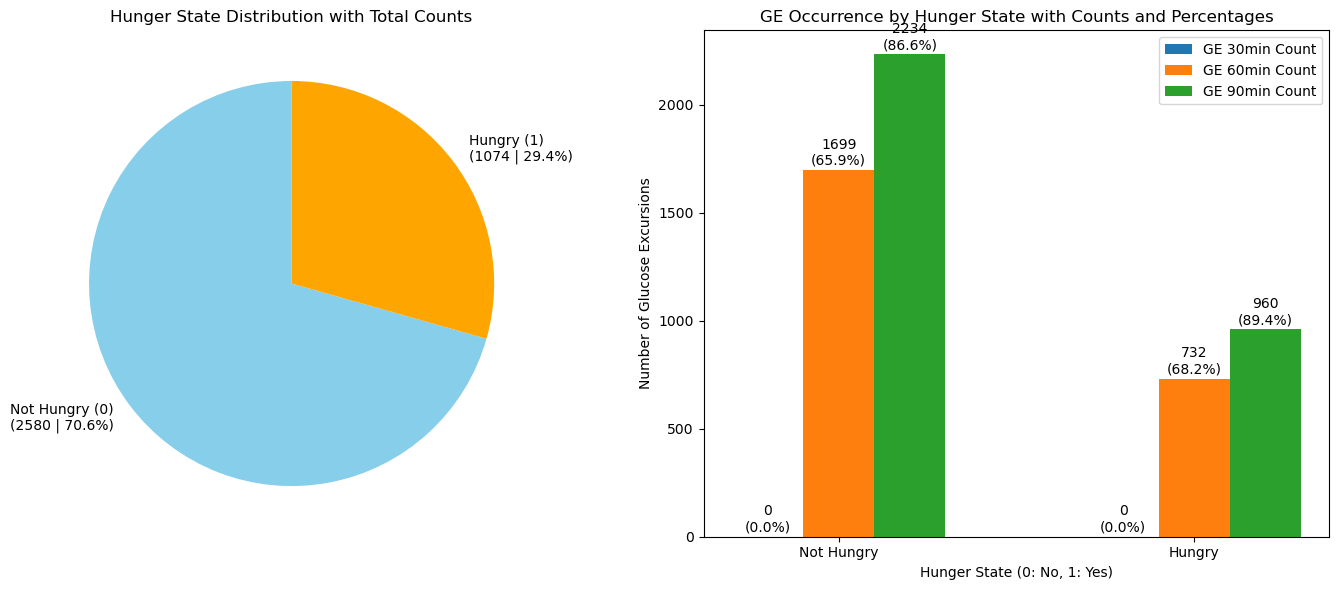

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Model_3.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 1. 배고픔 상태별 전체 응답과 GE 발생 요약
hunger_counts = df['hungry'].value_counts().sort_index()
hunger_percent = df['hungry'].value_counts(normalize=True).sort_index() * 100

GE_summary = df.groupby('hungry')[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].sum()
GE_summary['Total_Records'] = hunger_counts
GE_summary['GE_Total'] = GE_summary[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].sum(axis=1)

# 비율 계산
GE_summary['GE_30min_%'] = (GE_summary['GE_30min_occurred'] / GE_summary['Total_Records']) * 100
GE_summary['GE_60min_%'] = (GE_summary['GE_60min_occurred'] / GE_summary['Total_Records']) * 100
GE_summary['GE_90min_%'] = (GE_summary['GE_90min_occurred'] / GE_summary['Total_Records']) * 100

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 왼쪽: 원형 그래프
labels = ['Not Hungry (0)', 'Hungry (1)']
sizes = hunger_counts
percentages = hunger_percent

formatted_labels = [f'{label}\n({size} | {percentage:.1f}%)' for label, size, percentage in zip(labels, sizes, percentages)]
axes[0].pie(sizes, labels=formatted_labels, autopct='', startangle=90, colors=['skyblue', 'orange'])
axes[0].set_title("Hunger State Distribution with Total Counts")


# 오른쪽: GE 발생 그래프 (막대그래프)
GE_summary_plot = GE_summary.reset_index()
bar_width = 0.2
index = GE_summary_plot['hungry']

bars1 = axes[1].bar(index - bar_width, GE_summary_plot['GE_30min_occurred'], bar_width, label='GE 30min Count')
bars2 = axes[1].bar(index, GE_summary_plot['GE_60min_occurred'], bar_width, label='GE 60min Count')
bars3 = axes[1].bar(index + bar_width, GE_summary_plot['GE_90min_occurred'], bar_width, label='GE 90min Count')

# 수치와 비율 표시
def add_labels(bars, percentages):
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}\n({pct:.1f}%)',
                     ha='center', va='bottom', fontsize=10)

add_labels(bars1, GE_summary['GE_30min_%'])
add_labels(bars2, GE_summary['GE_60min_%'])
add_labels(bars3, GE_summary['GE_90min_%'])

# 막대그래프 설정
axes[1].set_xlabel('Hunger State (0: No, 1: Yes)')
axes[1].set_ylabel('Number of Glucose Excursions')
axes[1].set_title('GE Occurrence by Hunger State with Counts and Percentages')
axes[1].set_xticks(index)
axes[1].set_xticklabels(['Not Hungry', 'Hungry'])
axes[1].legend()

plt.tight_layout()
plt.show()


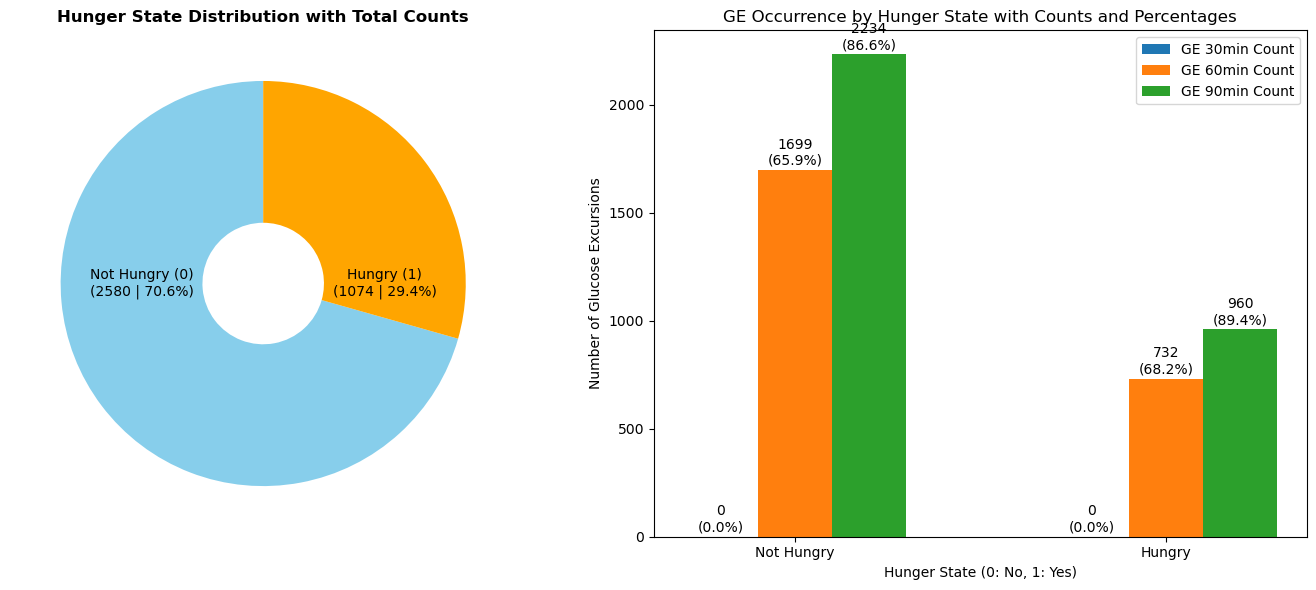

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 불러오기
file_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Model_3.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 배고픔 상태별 전체 응답과 비율 계산
hunger_counts = df['hungry'].value_counts().sort_index()
hunger_percent = df['hungry'].value_counts(normalize=True).sort_index() * 100

# GE 발생 요약
GE_summary = df.groupby('hungry')[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].sum()
GE_summary['Total_Records'] = hunger_counts
GE_summary['GE_Total'] = GE_summary[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].sum(axis=1)

# 비율 계산
GE_summary['GE_30min_%'] = (GE_summary['GE_30min_occurred'] / GE_summary['Total_Records']) * 100
GE_summary['GE_60min_%'] = (GE_summary['GE_60min_occurred'] / GE_summary['Total_Records']) * 100
GE_summary['GE_90min_%'] = (GE_summary['GE_90min_occurred'] / GE_summary['Total_Records']) * 100

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 왼쪽: 원형 그래프
sizes = hunger_counts
colors = ['skyblue', 'orange']

wedges, texts = axes[0].pie(sizes, startangle=90, colors=colors, wedgeprops=dict(width=0.7))

# 원 안쪽에 텍스트 위치 정확히 조정
axes[0].text(-0.6, 0, f"Not Hungry (0)\n({sizes[0]} | {hunger_percent[0]:.1f}%)", 
             ha='center', va='center', fontsize=10, color='black')

axes[0].text(0.6, 0, f"Hungry (1)\n({sizes[1]} | {hunger_percent[1]:.1f}%)", 
             ha='center', va='center', fontsize=10, color='black')

# 오른쪽: GE 발생 막대 그래프
GE_summary_plot = GE_summary.reset_index()
bar_width = 0.2
index = GE_summary_plot['hungry']

bars1 = axes[1].bar(index - bar_width, GE_summary_plot['GE_30min_occurred'], bar_width, label='GE 30min Count')
bars2 = axes[1].bar(index, GE_summary_plot['GE_60min_occurred'], bar_width, label='GE 60min Count')
bars3 = axes[1].bar(index + bar_width, GE_summary_plot['GE_90min_occurred'], bar_width, label='GE 90min Count')

# 수치와 비율 표시
def add_labels(bars, percentages):
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}\n({pct:.1f}%)',
                     ha='center', va='bottom', fontsize=10)

add_labels(bars1, GE_summary['GE_30min_%'])
add_labels(bars2, GE_summary['GE_60min_%'])
add_labels(bars3, GE_summary['GE_90min_%'])

# 막대그래프 설정
axes[1].set_xlabel('Hunger State (0: No, 1: Yes)')
axes[1].set_ylabel('Number of Glucose Excursions')
axes[1].set_title('GE Occurrence by Hunger State with Counts and Percentages')
axes[1].set_xticks(index)
axes[1].set_xticklabels(['Not Hungry', 'Hungry'])
axes[1].legend()

# 타이틀 설정
axes[0].set_title("Hunger State Distribution with Total Counts", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


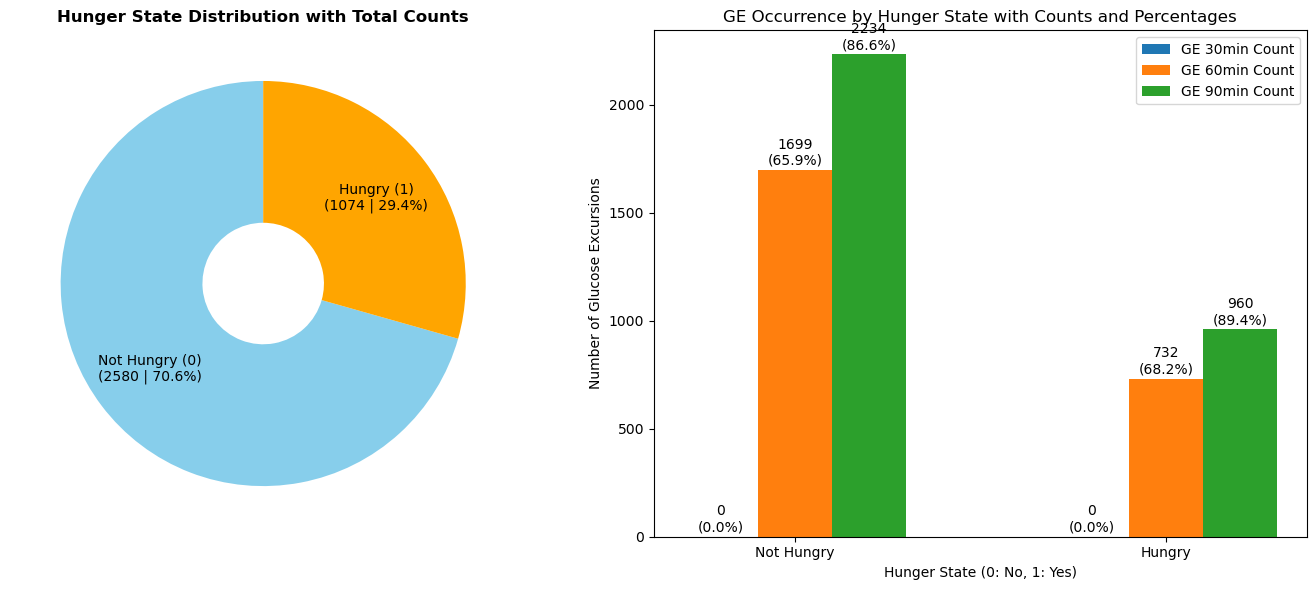

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 엑셀 파일 불러오기
file_path = '/Users/bg.lim/Downloads/Texas A&M_Agrilife/Projects/1.CGM/Pilot/Datas/Preprocessing/3.within_timepoint/Model_3.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 배고픔 상태별 전체 응답과 비율 계산
hunger_counts = df['hungry'].value_counts().sort_index()
hunger_percent = df['hungry'].value_counts(normalize=True).sort_index() * 100

# GE 발생 요약
GE_summary = df.groupby('hungry')[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].sum()
GE_summary['Total_Records'] = hunger_counts
GE_summary['GE_Total'] = GE_summary[['GE_30min_occurred', 'GE_60min_occurred', 'GE_90min_occurred']].sum(axis=1)

# 비율 계산
GE_summary['GE_30min_%'] = (GE_summary['GE_30min_occurred'] / GE_summary['Total_Records']) * 100
GE_summary['GE_60min_%'] = (GE_summary['GE_60min_occurred'] / GE_summary['Total_Records']) * 100
GE_summary['GE_90min_%'] = (GE_summary['GE_90min_occurred'] / GE_summary['Total_Records']) * 100

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---------- 원형 그래프 ----------
sizes = hunger_counts
colors = ['skyblue', 'orange']

wedges, _ = axes[0].pie(sizes, startangle=90, colors=colors, wedgeprops=dict(width=0.7))

# 섹션의 중심 각도 계산 및 텍스트 삽입
angles = [wedge.theta1 + (wedge.theta2 - wedge.theta1) / 2 for wedge in wedges]
radii = 0.7  # 텍스트 위치를 원의 가운데에서 조금 더 멀리 배치

# 각 섹션 중앙에 텍스트 넣기
for angle, label, size, percent in zip(angles, ['Not Hungry (0)', 'Hungry (1)'], sizes, hunger_percent):
    x = radii * np.cos(np.radians(angle))
    y = radii * np.sin(np.radians(angle))
    axes[0].text(x, y, f"{label}\n({size} | {percent:.1f}%)",
                 ha='center', va='center', fontsize=10, color='black')

# 타이틀 설정
axes[0].set_title("Hunger State Distribution with Total Counts", fontsize=12, fontweight="bold")

# ---------- 막대그래프 ----------
GE_summary_plot = GE_summary.reset_index()
bar_width = 0.2
index = GE_summary_plot['hungry']

bars1 = axes[1].bar(index - bar_width, GE_summary_plot['GE_30min_occurred'], bar_width, label='GE 30min Count')
bars2 = axes[1].bar(index, GE_summary_plot['GE_60min_occurred'], bar_width, label='GE 60min Count')
bars3 = axes[1].bar(index + bar_width, GE_summary_plot['GE_90min_occurred'], bar_width, label='GE 90min Count')

# 수치와 비율 표시
def add_labels(bars, percentages):
    for bar, pct in zip(bars, percentages):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width() / 2, height + 10, f'{int(height)}\n({pct:.1f}%)',
                     ha='center', va='bottom', fontsize=10)

add_labels(bars1, GE_summary['GE_30min_%'])
add_labels(bars2, GE_summary['GE_60min_%'])
add_labels(bars3, GE_summary['GE_90min_%'])

# 막대그래프 설정
axes[1].set_xlabel('Hunger State (0: No, 1: Yes)')
axes[1].set_ylabel('Number of Glucose Excursions')
axes[1].set_title('GE Occurrence by Hunger State with Counts and Percentages')
axes[1].set_xticks(index)
axes[1].set_xticklabels(['Not Hungry', 'Hungry'])
axes[1].legend()

plt.tight_layout()
plt.show()
